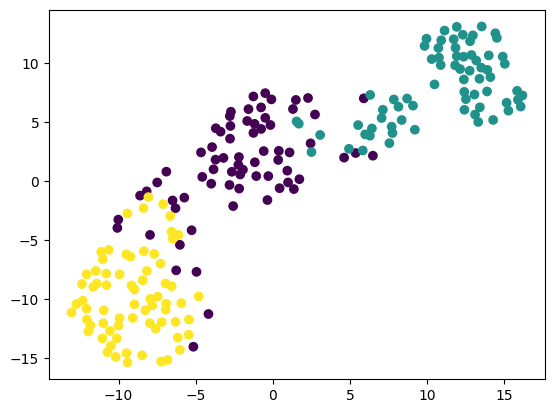

In [1]:
### t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

samples_df = pd.read_csv('datasets/Grains/seeds.csv', header=None).values

samples = samples_df[:, :7]
variety_numbers = samples_df[:, 7]


# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)

# Annotate the points
# for x, y, txt in zip(xs, ys, varieties):
#     plt.annotate(txt, (x, y), fontsize=9, ha='center', va='center')

plt.show()


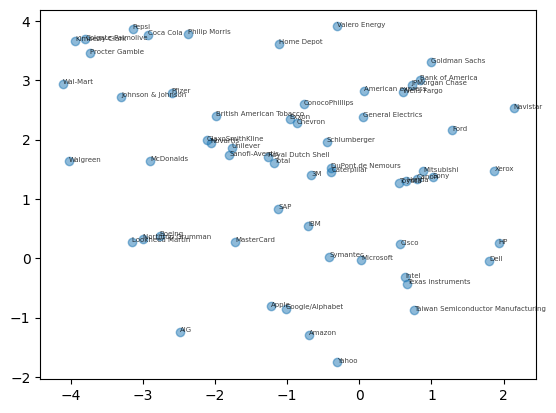

In [3]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
import pandas as pd

stocks_df = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)

# Get the NumPy array of movements: movements
movements = stocks_df.values

# Get the stock companies names: companies
companies = stocks_df.index

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


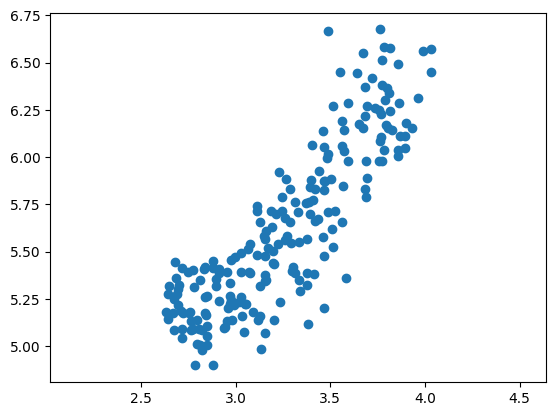

0.8604149377143466


In [4]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = pd.read_csv('datasets/Grains/seeds-width-vs-length.csv', header=None).values

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


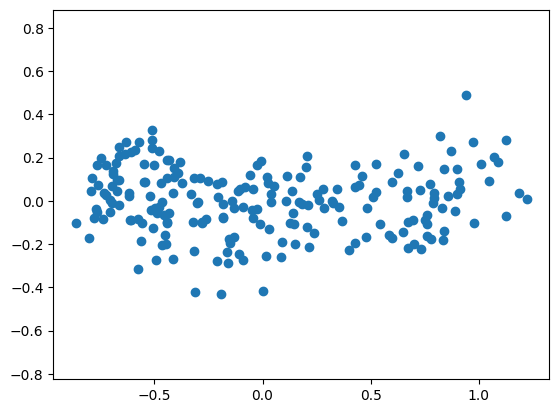

-5.204170427930421e-18


In [5]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

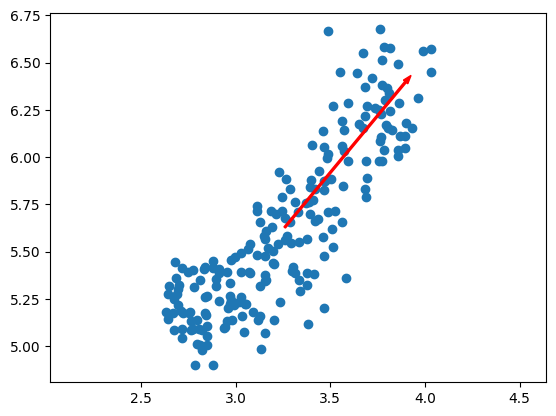

In [6]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Intrinsic dimension
This example uses the fish dataset

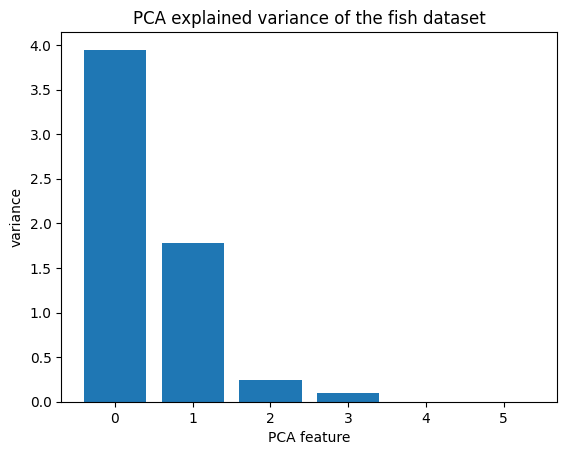

In [8]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd

fish = pd.read_csv('datasets/fish.csv', header=None).values

samples = fish[:, 1:]

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.title('PCA explained variance of the fish dataset')
plt.xticks(features)
plt.show()


In [10]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Make a pipeline chaining scaler and pca: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Getting the principal components
pca_features = pipeline.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### Tf-idf word-frequency array using wikipedia articles

In [13]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents_df = pd.read_csv('datasets/wikipedia/wikipedia-vectors.csv', index_col=0).values

documents = documents_df[:, 1]

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


AttributeError: 'numpy.float64' object has no attribute 'lower'

### Clustering Wikipedia articles part 1

In [29]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix
import pandas as pd

documents_df = pd.read_csv('datasets/wikipedia/wikipedia-vectors.csv', index_col=0)

articles = csr_matrix(documents_df.transpose())
titles = list(documents_df.columns)

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6, n_init='auto')

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Clustering Wikipedia articles part 2

In [30]:
# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
48      0                                     Gabapentin
58      1                                         Sepsis
50      1                                   Chad Kroeger
51      1                                     Nate Ruess
52      1                                     The Wanted
59      1                                    Adam Levine
54      1                                 Arctic Monkeys
55      1                                  Black Sabbath
56      1                                       Skrillex
57      1                          Red Hot Chili Peppers
53      1                                   Stevie Nicks
36      2              2014 FIFA World Cup qualification
35      2                Colombia national football team
34      2                             Zlatan Ibrahimović
33      2                                 Radamel Falcao
32      2                                   Arsenal F.C.
31      2                      

### NMF applied to Wikipedia articles

In [32]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.56]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.48]
 [0.01 0.01 0.01 0.03 0.   0.33]
 [0.   0.   0.02 0.   0.01 0.36]
 [0.   0.   0.   0.   0.   0.49]
 [0.02 0.01 0.   0.02 0.03 0.48]
 [0.01 0.03 0.03 0.07 0.02 0.34]
 [0.   0.   0.53 0.   0.03 0.  ]
 [0.   0.   0.35 0.   0.   0.  ]
 [0.01 0.01 0.31 0.06 0.01 0.02]
 [0.   0.01 0.34 0.01 0.   0.  ]
 [0.   0.   0.43 0.   0.04 0.  ]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.01 0.02 0.37 0.03 0.   0.01]
 [0.   0.   0.48 0.   0.   0.  ]
 [0.   0.01 0.55 0.   0.   0.  ]
 [0.   0.   0.46 0.   0.   0.  ]
 [0.   0.01 0.02 0.51 0.06 0.01]
 [0.   0.   0.   0.51 0.   0.  ]
 [0.   0.01 0.   0.42 0.   0.  ]
 [0.   0.   0.   0.43 0.   0.  ]
 [0.   0.   0.   0.49 0.   0.  ]
 [0.1  0.09 0.   0.38 0.   0.01]
 [0.   0.   0.   0.57 0.   0.01]
 [0.01 0.01 0.   0.47 0.   0.01]
 [0.   0.   0.   0.57 0.   0.  ]
 [0.   0.   0.   0.52 0.01 0.01]
 [0.   0.4

### NMF features of the Wikipedia articles

In [33]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003815
1    0.000000
2    0.000000
3    0.571943
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005575
2    0.000000
3    0.419620
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF learns topics of documents

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

### Explore the LED digits dataset

(100, 104)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


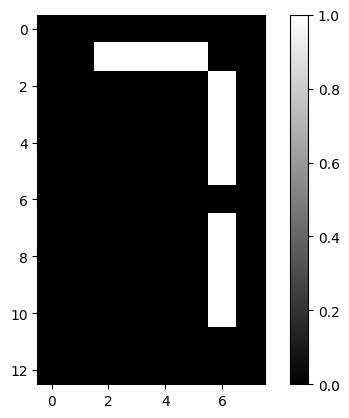

In [39]:
# Import pyplot
import matplotlib.pyplot as plt
import pandas as pd

samples = pd.read_csv('datasets/lcd-digits.csv', header=None).values

print(samples.shape)
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [40]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

### NMF learns the parts of images

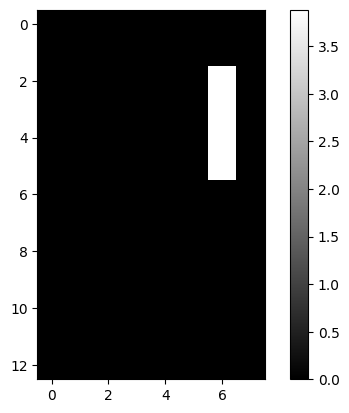

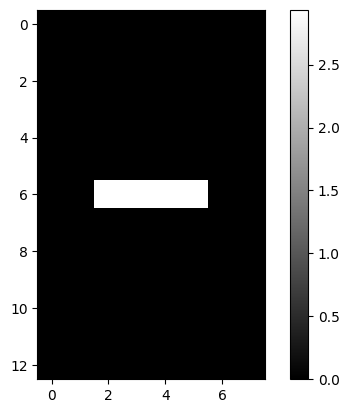

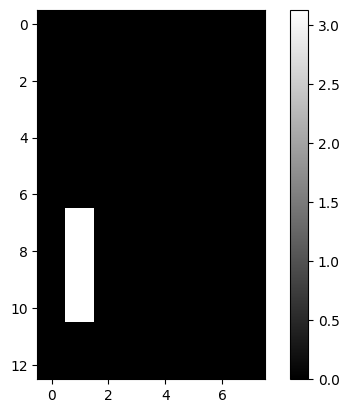

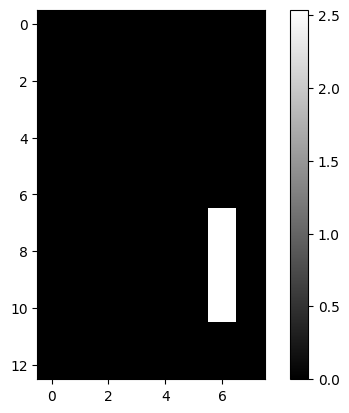

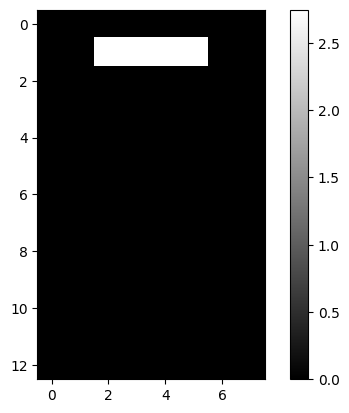

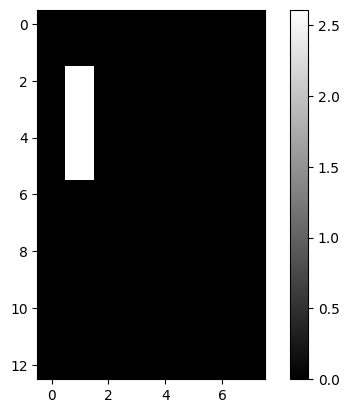

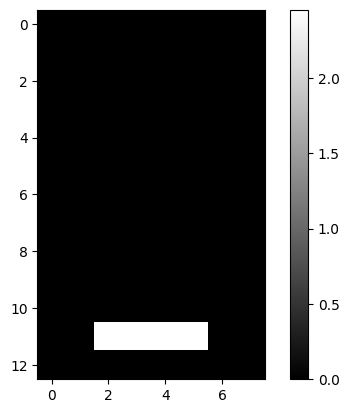

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281663e-14]


In [43]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts

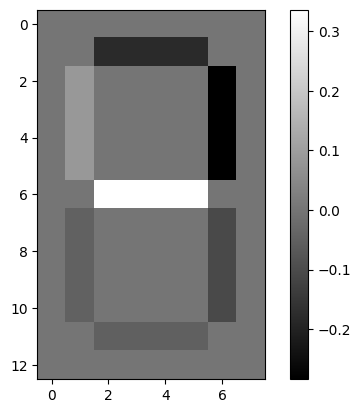

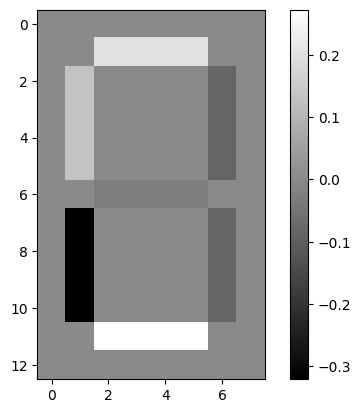

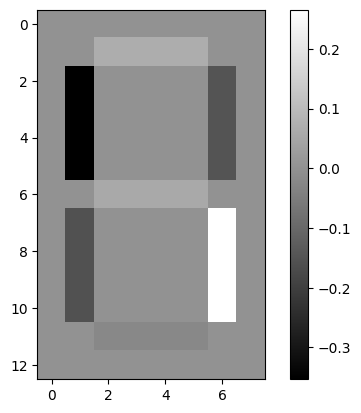

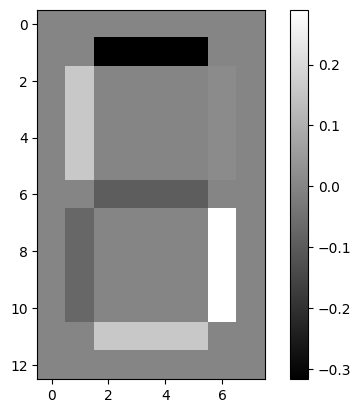

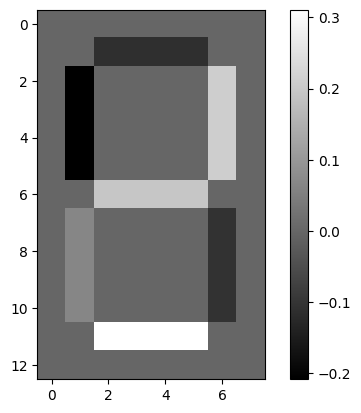

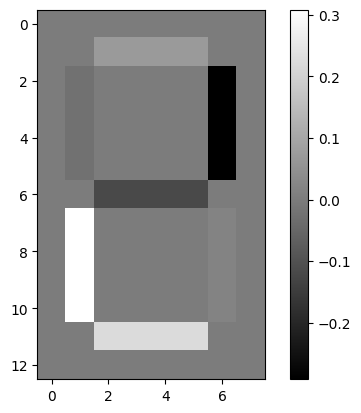

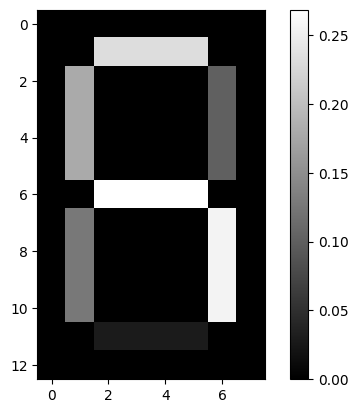

In [42]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

### Which articles are similar to 'Cristiano Ronaldo'?

In [46]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part 1

In [68]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer

import pandas as pd
from scipy.sparse import csr_matrix


# Read df by using read_csv
df = pd.read_csv('datasets/artists/scrobbler-small-sample.csv')

artists = csr_matrix(df.values)

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


### Recommend musical artists part 2

In [72]:
# Import pandas
import pandas as pd

artists_df = pd.read_csv('datasets/artists/artists.csv', header=None)

artist_names = list(artists_df[0])

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artists)
print(norm_features.shape)
# # Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']
#
# # Compute cosine similarities: similarities
similarities = df.dot(artist)
#
# # Display those with highest cosine similarity
print(similarities.nlargest())

ValueError: Shape of passed values is (2894, 20), indices imply (111, 20)

In [ ]:
def show_artist(artist_name):
    artist = df.loc[artist_name]
    similarities = df.dot(artist)
    print(similarities.nlargest())